In [1]:
import pandas as pd

In [2]:
df_entrenamiento = pd.read_csv("df_entrenamiento_final (2).csv")
df_prueba = pd.read_csv("df_prueba_final (2).csv")


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Variables categóricas y numéricas
categorical_features = ['categoria_instalaciones', 'Flavor', 'sub_canal_comercial',
                        'ProductType', 'Returnability', 'Size', 'Container', 'MLSize']

# Seleccionar las columnas de entrada y salida para entrenamiento y prueba
X_train_full = df_entrenamiento[['categoria_instalaciones', 'pc_comercial_300m', 'Flavor', 'MLSize',
                                 'pc_negocios_300m', 'pc_turismo_300m', 'gasto_promedio_300m',
                                 'ingreso_promedio_300m', 'accesibilidad', 'sub_canal_comercial',
                                 'ProductType', 'Returnability', 'Size', 'Container',
                                 'success_ratio', 'success_ratio_flavor', 'success_ratio_mlsize',
                                 'success_ratio_container', 'pob_ab_300m', 'pob_cmas_300m',
                                 'pob_c_300m', 'pob_cmen_300m', 'pob_dmas_300m', 'pob_d_300m',
                                 'pob_e_300m']]
y_train_full = df_entrenamiento['successful']

X_test = df_prueba[['categoria_instalaciones', 'pc_comercial_300m', 'Flavor', 'MLSize',
                    'pc_negocios_300m', 'pc_turismo_300m', 'gasto_promedio_300m',
                    'ingreso_promedio_300m', 'accesibilidad', 'sub_canal_comercial',
                    'ProductType', 'Returnability', 'Size', 'Container',
                    'success_ratio', 'success_ratio_flavor', 'success_ratio_mlsize',
                    'success_ratio_container', 'pob_ab_300m', 'pob_cmas_300m',
                    'pob_c_300m', 'pob_cmen_300m', 'pob_dmas_300m', 'pob_d_300m',
                    'pob_e_300m']]
y_test = df_prueba['successful']

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Concatenar para garantizar consistencia en categorías
X_combined = pd.concat([X_train, X_val, X_test], axis=0)
X_encoded = pd.get_dummies(X_combined, columns=categorical_features, drop_first=True)

# Dividir nuevamente en entrenamiento, validación y prueba
X_train_encoded = X_encoded.iloc[:len(X_train), :]
X_val_encoded = X_encoded.iloc[len(X_train):len(X_train) + len(X_val), :]
X_test_encoded = X_encoded.iloc[len(X_train) + len(X_val):, :]

# Crear el modelo Random Forest
#rf_model = RandomForestClassifier(n_estimators=600, random_state=42, class_weight='balanced',min_samples_split=10, min_samples_leaf=4,max_features='sqrt', max_depth=50, bootstrap=True)

# Definir el modelo de Regresión Logística
rl_model = LogisticRegression(penalty='l2',C=1.0,solver='lbfgs', max_iter=2000, class_weight='balanced',random_state=42       )

# Entrenar el modelo con el conjunto de entrenamiento
rl_model.fit(X_train_encoded, y_train)

# Evaluar en el conjunto de validación
y_val_pred = rl_model.predict(X_val_encoded)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Precisión en el conjunto de validación: {val_accuracy:.2f}')
print("\nReporte de clasificación en el conjunto de validación:")
print(classification_report(y_val, y_val_pred))
print("\nMatriz de confusión en el conjunto de validación:")
print(confusion_matrix(y_val, y_val_pred))

# Evaluar en el conjunto de prueba (opcional)
y_test_pred = rl_model.predict(X_test_encoded)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}')


Precisión en el conjunto de validación: 0.88

Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      5178
           1       0.67      0.93      0.78      1566

    accuracy                           0.88      6744
   macro avg       0.82      0.90      0.85      6744
weighted avg       0.91      0.88      0.88      6744


Matriz de confusión en el conjunto de validación:
[[4444  734]
 [ 103 1463]]

Precisión en el conjunto de prueba: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


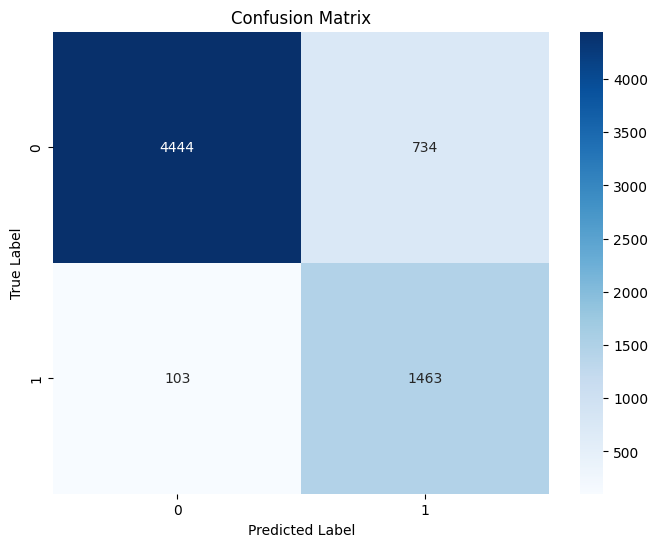

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix

# Obtener las probabilidades predichas
y_pred_prob = rl_model.predict(X_test_encoded)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convertir probabilidades a etiquetas

# Crear la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Dibujar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()
